# 1. Análise do banco de dados do governo das parcerias e relações nacionais

# 2. Nome e Matrícula:
### João Igor de Andrade Oliveira - 2018072409
### Lucas de Almeida Martins - 2018020328
### Rodolfo de Albuquerque Lessa Villa Verde - 2018020719

# 3. Descrição dos dados
### Qual a URL? https://github.com/RodolfoLessa/TP2_IBD.git
### Qual o domínio? https://dados.gov.br/dados/conjuntos-dados/parcerias-e-cooperacoes : Parcerias e Cooperações Nacionais
### Como os dados foram processados?

### Criação das tabelas do banco de dados

In [ ]:
import sqlite3
import pandas as pd

# Conexão ao banco de dados
conn = sqlite3.connect('dados_coop_nacionais.db')
cursor = conn.cursor()

# Esquema da tabela "Função"
funcao_table = '''
CREATE TABLE IF NOT EXISTS Funcao (
    ID_Funcao INTEGER PRIMARY KEY,
    NomeFuncao TEXT,
    CategoriaFuncao TEXT
)
'''

# Esquema da tabela "Órgão de Origem"
orgao_origem_table = '''
CREATE TABLE IF NOT EXISTS OrgaoOrigem (
    ID_Orgao INTEGER PRIMARY KEY,
    NomeOrgao TEXT,
    LocalizacaoOrgao TEXT,
    ID_Funcao INTEGER,
    FOREIGN KEY (ID_Funcao) REFERENCES Funcao (ID_Funcao)
)
'''

# Esquema da tabela "Instituição"
instituicao_parceira_table = '''
CREATE TABLE IF NOT EXISTS Instituicao (
    ID_Instituicao INTEGER PRIMARY KEY,
    NomeInstituicao TEXT,
    LocalizacaoInstituicao TEXT,
    ID_Area INTEGER,
    FOREIGN KEY (ID_Area) REFERENCES Area (ID_Area)
)
'''

# Esquema da tabela "Area"
area_table = '''
CREATE TABLE IF NOT EXISTS Area (
    ID_Area INTEGER PRIMARY KEY,
    NomeArea TEXT,
    CategoriaArea TEXT
)
'''

# Esquema da tabela "Parceria"
parceria_table = '''
CREATE TABLE IF NOT EXISTS Parceria (
    ID_Parceria INTEGER PRIMARY KEY,
    Descricao TEXT,
    Ano INTEGER
)
'''

# Esquema da tabela intermediária "Parceria Instituicao Orgao"
parceria_instituicao_orgao_table = '''
CREATE TABLE IF NOT EXISTS ParceriaInstituicaoOrgao (
    ID_Parceria INTEGER,
    ID_Orgao INTEGER,
    ID_Instituicao INTEGER,
    FOREIGN KEY (ID_Parceria) REFERENCES Parceria (ID_Parceria),
    FOREIGN KEY (ID_Orgao) REFERENCES OrgaoOrigem (ID_Orgao),
    FOREIGN KEY (ID_Instituicao) REFERENCES InstituicaoParceira (ID_Instituicao)
)
'''

# Execução dos esquemas das tabelas
cursor.execute(orgao_origem_table)
cursor.execute(funcao_table)
cursor.execute(instituicao_parceira_table)
cursor.execute(area_table)
cursor.execute(parceria_table)
cursor.execute(parceria_instituicao_orgao_table)

### Inserção dos valores nas tabelas

In [ ]:
# Valores do campo de dados da Entidade Órgãos
nome_orgao = ['Centro de Tecnologia da Informação Renato Archer']

localizacao_orgao = ['Campinas/SP']

# Verificar se a tabela "OrgaoOrigem" está vazia
cursor.execute("SELECT COUNT(*) FROM OrgaoOrigem")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "OrgaoOrigem"
    for i in range(len(nome_orgao)):
        cursor.execute('''
        INSERT INTO OrgaoOrigem (NomeOrgao, LocalizacaoOrgao, ID_Funcao)
        VALUES (?, ?, ?)
        ''', (nome_orgao[i], localizacao_orgao[i], 1))

nome_funcao = 'Integração entre os meios produtivo e o acadêmico'
categoria_funcao = 'Ciência, informação e comunicação'

# Verificar se a tabela "Funcao" está vazia
cursor.execute("SELECT COUNT(*) FROM Funcao")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "Funcao"
    cursor.execute('''
    INSERT INTO Funcao (NomeFuncao, CategoriaFuncao)
    VALUES (?, ?)
    ''', (nome_funcao, categoria_funcao))

# Valores do campo de dados da Entidade Institutos
nome_instituto = [
    'Associação Brasileira do Emprego Apoiado (ABEA)',
    'Bio.inn',
    'BioEdtech',
    'Biosys Gestão em Meio Ambiente LTDA',
    'BYD Energy do Brasil',
    'Centro Boldrini',
    'Centro Brasileiro de Pesquisas Físicas (CBPF)',
    'Centro de Desenvolvimento Tecnológico em Saúde (CDTS) da Fundação Osvaldo Cruz (Fiocruz)',
    'Centro de Inovação em Novas Energias (CINE)',
    'Centro de Pesquisa e Desenvolvimento em Telecomunicações (CPQD)',
    'Centro Nacional de Tecnologia Eletrônica Avançada S.A. (CEITEC)',
    'CEPID - BRAINN',
    'Centro de Desenvolvimento de Materiais Funcionais',
    'Centro Universitário FEI',
    'Companhia de Saneamento Básico do Estado de São Paulo - SABESP',
    'Eyedea Educação e Desenvolvimento em Oftalmologia LTDA.',
    'Fundação Oswaldo Cruz (Fiocruz) Unidade de Ribeirão Preto/SP',
    'Furukawa Electric LatAm S.A.',
    'Hospital da Restauração-Recife',
    'Hospital das Clínicas-Faculdade de Medicina (USP)',
    'Hospital Municipal Miguel Couto-Rio de Janeiro',
    'Indústria, Comércio, Importação e Exportação de Tintas Condutivas - TICON Ltda.',
    'Instituto de Biologia Molecular do Paraná - IBMP',
    'Instituto de Desenvolvimento de Londrina - CODEL',
    'Instituto Estadual de Campinas (UNICAMP)',
    'Instituto Federal do Rio Grande do Norte (IFRN)',
    'Instituto iCORPS Brasil',
    'Instituto Mauá de Tecnologia (IMT)',
    'Instituto Nacional de Ciência e Tecnologia de Sistemas Micro e Nanoeletrônicos (INCT NAMITEC)',
    'Instituto Nacional de Ciência e Tecnologia em Biofabricação (INCT BIOFABRIS)',
    'Instituto Nacional de Ciência e Tecnologia em Medicina Regenerativa (INCT REGENERA)',
    'Instituto Nacional de Ciência e Tecnologia para Sistemas Autônomos Cooperativos (InSAC)',
    'Instituto Nacional de Metrologia (INMETRO)',
    'Instituto Nacional de Pesquisas Espaciais (INPE)',
    'Instituto de Estudos Avançados (IEAv)',
    'Instituto Nacional de Tecnologia - INT',
    'Instituto Tecnológico de Aeronáutica (ITA)',
    'Ministério da Ciência, Tecnologia e Inovações (MCTI)',
    'Ministério do Desenvolvimento Regional (MDR)',
    'NAMITEC II',
    'Núcleo de Perícias Criminalísticas de Campinas',
    'Pontifícia Universidade Católica de Campinas (PUC-Campinas)',
    'Rede de Nanodispositivos e Nanossensores (SIBRATECNANO)',
    'Rede Nacional de Ensino e Pesquisa (RNP)',
    'Tecnologia em Sistemas Automotivos - TSA Ltda.',
    'Tribunal Superior Eleitoral',
    'Universidade de São Paulo (USP)',
    'Universidade do Estado da Bahia (UNEB)',
    'Universidade Estadual de Campinas (UNICAMP)',
    'Universidade Estadual Paulista (UNESP)',
    'Universidade Federal de Alagoas (UFAL)',
    'Universidade Federal de Juiz de Fora (UFJF)',
    'Universidade Federal de Santa Catarina (UFSC)',
    'Universidade Federal de Santa Maria (UFSM)',
    'Universidade Federal de São Paulo (UNIFESP)',
    'Universidade Federal Fluminense (UFF)',
    'Universidade Federal do ABC (UFABC)',
    'Vetra',
    'Visto.Bio',
    'Vyttra Diagnósticos'
]

localizacao_instituto = [
    'São Paulo/SP',                     # Associação Brasileira do Emprego Apoiado (ABEA)
    'São Paulo/SP',                     # Bio.inn
    'São Paulo/SP',                     # BioEdtech
    'São Paulo/SP',                     # Biosys Gestão em Meio Ambiente LTDA
    'Campinas/SP',                      # BYD Energy do Brasil
    'Campinas/SP',                      # Centro Boldrini
    'Rio de Janeiro/RJ',                # Centro Brasileiro de Pesquisas Físicas (CBPF)
    'Rio de Janeiro/RJ',                # Centro de Desenvolvimento Tecnológico em Saúde (CDTS) da Fundação Osvaldo Cruz (Fiocruz)
    'Campinas/SP',                      # Centro de Inovação em Novas Energias (CINE)
    'Campinas/SP',                      # Centro de Pesquisa e Desenvolvimento em Telecomunicações (CPQD)
    'São Carlos/SP',                    # Centro Nacional de Tecnologia Eletrônica Avançada S.A. (CEITEC)
    'Campinas/SP',                      # CEPID - BRAINN
    'Campinas/SP',                      # Centro de Desenvolvimento de Materiais Funcionais
    'São Bernardo do Campo/SP',         # Centro Universitário FEI
    'São Paulo/SP',                     # Companhia de Saneamento Básico do Estado de São Paulo - SABESP
    'São Paulo/SP',                     # Eyedea Educação e Desenvolvimento em Oftalmologia LTDA.
    'Ribeirão Preto/SP',                # Fundação Oswaldo Cruz (Fiocruz) Unidade de Ribeirão Preto/SP
    'Curitiba/PR',                      # Furukawa Electric LatAm S.A.
    'Recife/PE',                        # Hospital da Restauração-Recife
    'São Paulo/SP',                     # Hospital das Clínicas-Faculdade de Medicina (USP)
    'Rio de Janeiro/RJ',                # Hospital Municipal Miguel Couto-Rio de Janeiro
    'São Paulo/SP',                     # Indústria, Comércio, Importação e Exportação de Tintas Condutivas - TICON Ltda.
    'Curitiba/PR',                      # Instituto de Biologia Molecular do Paraná - IBMP
    'Londrina/PR',                      # Instituto de Desenvolvimento de Londrina - CODEL
    'Campinas/SP',                      # Instituto Estadual de Campinas (UNICAMP)
    'Natal/RN',                         # Instituto Federal do Rio Grande do Norte (IFRN)
    'São Paulo/SP',                     # Instituto iCORPS Brasil
    'São Paulo/SP',                     # Instituto Mauá de Tecnologia (IMT)
    'Campinas/SP',                      # Instituto Nacional de Ciência e Tecnologia de Sistemas Micro e Nanoeletrônicos (INCT NAMITEC)
    'Campinas/SP',                      # Instituto Nacional de Ciência e Tecnologia em Biofabricação (INCT BIOFABRIS)
    'São Paulo/SP',                     # Instituto Nacional de Ciência e Tecnologia em Medicina Regenerativa (INCT REGENERA)
    'São Paulo/SP',                     # Instituto Nacional de Ciência e Tecnologia para Sistemas Autônomos Cooperativos (InSAC)
    'Duque de Caxias/RJ',               # Instituto Nacional de Metrologia (INMETRO)
    'São José dos Campos/SP',           # Instituto Nacional de Pesquisas Espaciais (INPE)
    'São José dos Campos/SP',           # Instituto de Estudos Avançados (IEAv)
    'Rio de Janeiro/RJ',                # Instituto Nacional de Tecnologia - INT
    'São José dos Campos/SP',           # Instituto Tecnológico de Aeronáutica (ITA)
    'Brasília/DF',                      # Ministério de Ciência, Tecnologia e Inovações (MCTI)
    'Brasília/DF',                      # Ministério do Desenvolvimento Regional (MDR)
    'Campinas/SP',                      # NAMITEC II
    'Campinas/SP',                      # Núcleo de Perícias Criminalísticas de Campinas
    'Campinas/SP',                      # Pontifícia Universidade Católica de Campinas (PUC-Campinas)
    'Campinas/SP',                      # Rede de Nanodispositivos e Nanossensores (SIBRATECNANO)
    'Brasília/DF',                      # Rede Nacional de Ensino e Pesquisa (RNP)
    'São Paulo/SP',                     # Tecnologia em Sistemas Automotivos - TSA Ltda.
    'Brasília/DF',                      # Tribunal Superior Eleitoral
    'São Paulo/SP',                     # Universidade de São Paulo (USP)
    'Salvador/BA',                      # Universidade do Estado da Bahia (UNEB)
    'Campinas/SP',                      # Universidade Estadual de Campinas (UNICAMP)
    'São Paulo/SP',                     # Universidade Estadual Paulista (UNESP)
    'Maceió/AL',                        # Universidade Federal de Alagoas (UFAL)
    'Juiz de Fora/MG',                  # Universidade Federal de Juiz de Fora (UFJF)
    'Florianópolis/SC',                 # Universidade Federal de Santa Catarina (UFSC)
    'Santa Maria/RS',                   # Universidade Federal de Santa Maria (UFSM)
    'São Paulo/SP',                     # Universidade Federal de São Paulo (UNIFESP)
    'Niterói/RJ',                       # Universidade Federal Fluminense (UFF)
    'Santo André/SP',                   # Universidade Federal do ABC (UFABC)
    'São Paulo/SP',                     # Vetra
    'São Paulo/SP',                     # Visto.Bio
    'Campinas/SP'                       # Vyttra Diagnósticos
]

Index_Area = [9, 6, 3, 2, 5, 1, 8, 1, 5, 4, 4, 7, 7, 7, 2, 1, 1, 4, 1, 1, 1, 5, 8, 7, 7, 7, 7, 7, 7, 7, 7, 10, 7, 7, 7, 7, 10, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 2, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Verificar se a tabela "Insitituicao" está vazia
cursor.execute("SELECT COUNT(*) FROM Instituicao")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "Instituicao"
    for i in range(len(nome_instituto)):
        cursor.execute('''
        INSERT INTO Instituicao (NomeInstituicao, LocalizacaoInstituicao, ID_Area)
        VALUES (?, ?, ?)
        ''', (nome_instituto[i], localizacao_instituto[i], Index_Area[i]))


# Valores do campo de dados da Entidade Parcerias
descricoes = [
    'Construção de metodologia de inclusão social de egressas do cárcere pela via do emprego apoiado: uma proposta para formulação de políticas públicas de geração de trabalho e renda.',
    'Desenvolvimento de tratamento mecânico com processo hidrometalúrgico para recuperação de materiais plásticos e metais ferrosos e não ferrosos.',
    'Materiais avançados perovskita para células solares tandem de alta eficiência monolíticas com silício cristalino.',
    'Uma Plataforma para Prontuários Semânticos de Saúde para o Domínio da Oncologia',
    'Desenvolvimento e aplicações de tecnologias 3D físicas e virtuais para soluções de cirurgias de cranioplastia - as cirurgias plásticas de reconstrução do crânio pós-craniectomia descompressiva envolvem um alto custo, o que torna sua realização na rede SUS economicamente inviável. O grupo multidisciplinar deste projeto vem aprimorando tecnologias físicas de manufatura aditiva (impressão 3D) e neurofisiológicas para próteses customizadas para a reconstrução de defeitos extensos da calota craniana, com custos acessíveis à rede SUS.',
    'Células solares de perovskita para fotossíntese artificial - esta cooperação tem como objetivos: 1) pesquisa e desenvolvimento de novos materiais baseados em perovskitas; 2) método para processamento de células fotovoltaicas de 25 cm2 constituídas dos novos materiais; e 3) integração da célula fotovoltaica com sistemas de redução de CO2 e de geração de hidrogênio.',
    'Sisfóton-MCTI - Laboratório Integrador-CPQD - consultoria com o objetivo de promover a integração dos laboratórios do Sisfóton-MCTI, difundindo os modelos de negócio e operação, as boas práticas e compartilhamento de experiências, estimulando a aproximação e conexão entre os ambientes de pesquisa, negócios e investimentos com as empresas.',
    'Rede de Cooperação em neurociência e neurotecnologa para desenvolvimento de pesquisas sobre o cérebro e seus mecanismos, coordenada pela UNICAMP, com apoio financeiro da FAPESP.',
    'Formação de um Centro Multidisciplinar para o Desenvolvimento de Materiais Funcionais (CDMF)',
    'Prova de Conceito (PoC) de monitoramento contínuo da Demanda Bioquímica de Oxigênio (DBO) e nível de O2 dissolvido nos fluxos de entrada e de saída em uma Estação de Tratamento de Esgoto (ETE) da SABESP.',
    'Instrumentos para inovação em cirurgias oculares.',
    'Estruturação de uma metodologia 3D detalhada para a produção de baixo custo, de próteses cranianas customizadas constituídas de cimento ósseo para crianças.',
    'Desenvolvimento de Chip.',
    'Soluções para diagnóstico point-of-care e lab-on-a-chip.',
    'Desenvolver ações conjuntas e estabelecer cooperação nas seguintes áreas: 1) fomento de tecnologias voltadas para o setor de saúde, buscando soluções de engenharia, pelo emprego das tecnologias 3D, para a área da medicina; e 2) Intercâmbio de conhecimento e colaboração no desenvolvimento de tecnologias que utilizem inteligência artificial.',
    'Desenvolvimento do empreendedorismo de base tecnológica e geração de novos negócios, nas áreas de: Eletrônica Têxtil e Vestível, Energias Renováveis e Sustentabilidade, Nanotecnologia, Internet das Coisas (IoT), Manufatura Aditiva, Robótica, Biofabricação, Sensores e Biosensores, Realidade Aumentada e Virtual, Simulação Computacional e Tecnologia Assistiva, Inteligência Artificial, Big Data e Segurança Cibernética, Fotônica, Materiais Avançados e Micro e Nanoeletrônica.',
    'O INCT NAMITEC desenvolvimento de projetos de P&D em micro e nanoeletrônica, em temas tais como: redes de sensores sem fio, IoT, sistemas embarcados, projeto de circuitos integrados, estudos de dispositivos, materiais e técnicas de fabricação. Em especial, os laboratórios do CTI mais demandados pelo NAMITEC foram os de micro e nanofabricação, o de empacotamento eletrônico avançado e análise de falhas em componentes e sistemas eletrônicos. Soluções desenvolvidas com esse apoio incluem redes de sensores com aplicação na agropecuária e circuitos integrados tolerantes a radiação.',
    'O BIOFABRIS tem como objetivo a integração de ferramentas computacionais, síntese e desenvolvimento de novos biomateriais, e aplicação de técnicas de engenharia para obtenção de dispositivos biomédicos (próteses e órteses ortopédicas) e de substitutos biológicos para tecidos vivos ou órgãos humanos defeituosos ou faltantes.',
    'Biomodelagem aplicada ao estudo e desenvolvimento de dispositivos biomédicos: design e biomateriais.',
    'O Programa do INCT-REGENERA tem como objetivo principal organizar e articular uma Rede nacional de competências acadêmicas e da indústria para o desenvolvimento de estratégias terapêuticas em Medicina Regenerativa com foco na redução da morbidade e mortalidade em diferentes doenças.',
    'O CTI participa do Instituto Nacional de Ciência e Tecnologia para Sistemas Autônomos Cooperativos Aplicados em Segurança e Meio Ambiente (InSAC). Mais especificamente, do Grupo de Trabalho GT2 - Sistemas Robóticos Leves. As atividades desse grupo abrangem o desenvolvimento de duas plataformas mais leves que o ar não tripuladas (dirigível e aeróstato) e suas aplicações de cunho ambiental na Amazônia.',
    'Projeto CITAR - Circuitos Integrados Tolerantes à Radiação, financiado pela FINEP, iniciado em 2012, cujo objetivo é desenvolver e qualificar componentes para os satélites lançados pelo Brasil, bem como os testes necessários para sua certificação.',
    'Estudo e desenvolvimento de estruturas celulares fabricadas por impressão 3D.',
    'Servovisão direta de robôs indústrias. A presente cooperação tem por objetivo o desenvolvimento de novos modelos matemáticos e métodos computacionais de visão robótica para estimação paramétrica e controle automático de robôs industriais. Dentre as mais variadas aplicações, destacam-se: manuseio de peças e materiais (pick-and-place), paletização e despaletização, montagem, inspeção de peças, etc.',
    'Integração do CTI-Nano, CTI Renato Archer, ao Sistema Nacional de Laboratórios em Nanotecnologias (SisNANO) na categoria de Laboratório Estratégico. O CTI-Nano é capaz de apoiar projetos de P,D&I em nanodispositivos-nanossistemas eletrônicos e fotônicos, cobrindo etapas de desenho, fabricação, encapsulamento e caracterização eletroóptica.',
    'O NAMITEC II tem como foco materiais, processos, novos dispositivos semicondutores e circuitos de interface para aplicações de IoT e outras, incluindo controle ambiental, qualidade o solo, de água, do ar, detecção de gases, aplicações biomédicas e de agropecuária. Estes temas estão na vanguarda da evolução tecnológica mundial, onde chips e sensores mais avançados e específicos são cruciais para a inovação em vários setores. Os dispositivos e sensores a serem pesquisados e desenvolvidos incluem FinFET, BioFET, ISFET, FET de grafeno, QuBit, fotônica integrada, sensores de vários tipos e circuitos de interface para estes dispositivos. Além desses, também tem também trabalho em dispositivos de carbeto de silício, requerida para a indústria automobilística e novas células solares TANDEN para aumentar eficiência. O trabalho deste INCT permitirá formar uma base sólida para o desenvolvimento e crescimento do setor industrial de componentes eletrônicos, sensores, fotônicos e optoeletrônicos e sistemas para tornar o país mais competitivo e avançado.',
    'Estudos e pesquisas para atender a demanda da Polícia Científica.',
    'Estudos e Pesquisas em Tecnologia da Informação e Interação com a Área de Psicologia.',
    'Rede de Nanodispositivos e Nanossensores com o objetivo de desenvolver um teste rápido e portátil para detecção de doenças infecciosas.',
    'Sistema de Avaliação de Cidades Inteligentes Sustentáveis - desenvolvimento de metodologia de avaliação de maturidade para cidades inteligentes, baseada em critérios definidos pela União Internacional de Telecomunicações (UIT).',
    'Estudos e prospecção de oportunidades de cooperação técnica na área de impressão em 3D.',
    'Pesquisa, desenvolvimento e inovação de tecnologia em qualificação e análise de hardware das urnas eletrônicas e outros equipamentos utilizados no processo eleitoral, voltados ao aprimoramento tecnológico do ecossistema de votação eletrônica.',
    'Cooperação no âmbito de Projeto Temático FAPESP intitulado - "Study, development and of a hybrid process: Additive Manufacturing (AM) + Hgh Speed Machining / Grinding (HSM/G) -MH2026".',
    'InVesalius - software livre e de código aberto para processamento e análise de imagens médicas como uma solução para a necessidade de integrar scanners médicos e a impressão 3D. Atualmente o InVesalius incorpora as técnicas mais modernas de computação gráfica, algoritmos especiais e inteligência artificial para atingir resultados precisos, rápidos e seguros. Alguns desmembramentos do InVesalius em pesquisa e inovação podem ser observados mundo afora, com destaque para o Neuronavegador InVesalius, desenvolvido pelo Departamento de Física da USP, em Ribeirão Preto.',
    'Aplicação de Robô Social em Interação com Crianças nos Casos de Mutismo Seletivo e Fobia Social.',
    'Apoio Científico e Tecnológico ao projeto de pesquisa do Prof. Walter Araújo, com foco no desenvolvimento e fabricação por manufatura aditiva de dispositivos microfluídicos, no contexto de pesquisa na área biomédica, para geração de microbolhas monodispersas como unidades carreadoras de compostos biologicamente ativos, extraídos de plantas do semiárido para o tratamento localizado de tumores.',
    'Desenvolvimento de sistemas robóticos multimodais (som, imagem, movimento, inteligência), desenvolvimento e orientação conjunta em graduação e pós-graduação.',
    'Servovisão direta de robôs não-holonômicos. A presente cooperação tem por objetivo o desenvolvimento de novos modelos matemáticos e métodos computacionais de visão robótica para estimação paramétrica e controle automático de robôs do tipo uniciclo. Dentre as mais variadas aplicações, destacam-se: rastreamento de alvos terrestres fixos ou móveis, posicionamento automático de carros autônomos, etc.',
    'Rede de Inovação do BRICS (iBRICS Network) - estabelecimento de uma nova estrutura para a cooperação em ciência, tecnologia e inovação no âmbito do grupo, que é formado pelo Brasil, Rússia, Índia, China e África do Sul.',
    'Pesquisa e desenvolvimento de tecnologias para Web Semântica, tecnologias para dados ligados abertos, design aberto e suas aplicações em sistemas enativos.',
    'Síntese de carbono com alto grau de grafitização a partir de biomassa para aplicação em dispositivos eletrônicos.',
    'Participação no desenvolvimento de sistemas de fotodetecção sob argônio líquido, para neutrinos nos experimentos DUNE - Deep Underground Neutrino Experiment.',
    'Módulos Solares de Perovskita, Grafeno e Óxido de Nióbio: como o Brasil pode ser competitivo em energia fotovoltaica.',
    'Funcionalização de dispositivos microfabricados visando à captura seletiva de células tumorais circulantes para fins de diagnóstico.',
    'Desenvolvimento de biossensores nanoestruturados para detecção de gases orgânicos voláteis (VOCs).',
    'Desenvolvimento de materiais e dispositivos eletroluminescentes impressos.',
    'Materiais avançados e nanotecnologia para aplicações em baterias e eletrônica têxtil.',
    'Desenvolvimento de pesquisa visando o estudo sobre a transcrição em Braille de peças didáticas para piano de compositores brasileiros contemporâneos.',
    'Desenvolvimento de Novos Materiais para Impressão 3D de Próteses Buco-Maxilo-Faciais Multifuncionais Customizadas Utilizando Ferramentas da Saúde 4.0.',
    'Desenvolvimento de testes eletroquímicos portáteis para o diagnóstico multiplex de doenças negligenciadas transmitidas por vetores. Essa proposta pretende, de maneira inovadora, desenvolver um novo conceito de testes eletroquímicos multiplex e portáteis, baseados em nanoestruturas de ZnO, capazes de realizar o diagnóstico simultâneo de doenças negligenciáveis de forma precisa, rápida e sem reação cruzada.'
]

anos = [2022, 2019, 2021, 2023, 2021, 2022, 2020, 2023, 2019, 2020, 2022, 2021, 2019, 2023, 2020, 2022, 2021, 2020, 2019, 2023, 2022, 2020, 2019, 2023, 2021, 2020, 2022, 2019, 2023, 2021, 2020, 2022, 2019, 2023, 2020, 2022, 2021, 2023, 2019, 2020, 2021, 2023, 2020, 2019, 2022, 2021, 2020, 2023, 2019, 2022]


# Verificar se a tabela "Parceria" está vazia
cursor.execute("SELECT COUNT(*) FROM Parceria")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "Parceria"
    for i in range(len(descricoes)):
        cursor.execute('''
        INSERT INTO Parceria (Descricao, Ano)
        VALUES (?, ?)
        ''', (descricoes[i], anos[i]))

# Valores do campo de dados da Entidade Area

nome_area = [
    'Aplicação de tecnologias avançadas em serviços de saúde e diagnósticos',
    'Desenvolvimento de soluções tecnológicas para gestão ambiental',
    'Desenvolvimento de tecnologias educacionais',
    'Desenvolvimento de tecnologias para telecomunicações',
    'Desenvolvimento de tecnologias sustentáveis e energias renováveis',
    'Inovação em biotecnologia e ciências da vida',
    'Pesquisa e desenvolvimento em diversas áreas tecnológicas',
    'Pesquisa em física e áreas relacionadas',
    'Promoção da inclusão no emprego de pessoas com deficiência',
    'Regulação e desenvolvimento de tecnologias relacionadas à metrologia e qualidade'
]

categoria_area = [
    'Saúde e Medicina',
    'Sustentabilidade e Meio Ambiente',
    'Educação e Tecnologia',
    'Telecomunicações e Tecnologia da Informação',
    'Sustentabilidade e Energia',
    'Ciências da Vida',
    'Tecnologia',
    'Física e Ciências Naturais',
    'Inclusão Social',
    'Regulação e Qualidade'
]

# Verificar se a tabela "Area" está vazia
cursor.execute("SELECT COUNT(*) FROM Area")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "Area"
    for i in range(len(nome_area)):
        cursor.execute('''
        INSERT INTO Area (NomeArea, CategoriaArea)
        VALUES (?, ?)
        ''', (nome_area[i], categoria_area[i]))

Key_Parceria =  [    1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 7, 8, 8, 8, 8, 9, 9, 9, 9,
                    10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 19, 19, 20, 21, 22, 22,
                    22, 22, 22, 23, 24, 25, 26, 26, 26, 26, 26, 27, 28, 29, 29, 30,
                    30, 30, 31, 32, 33, 34, 35, 35, 36, 37, 38, 39, 40, 41, 42, 43,
                    43, 44, 44, 44, 45, 46, 47, 48, 49, 50, 50, 50, 50]

Key_Instituto = [   1, 4, 5, 6, 49, 52, 8, 33, 56, 19, 21, 9, 10, 12, 49, 55, 57, 13, 49, 23, 11, 15, 16, 17, 18, 23, 24, 27, 29,
                    30, 30, 7, 52, 31, 32, 34, 35, 47, 14, 28, 36, 37, 38, 40, 47, 49, 14, 34, 41, 42, 43, 59, 44, 38, 39, 45, 46,
                    47, 47, 47, 20, 48, 49, 49, 49, 49, 49, 49, 49, 26, 49, 47, 55, 50, 50, 22, 53, 54, 57, 58, 2, 3]

# Verificar se a tabela "ParceriaInstituicaoParceira" está vazia
cursor.execute("SELECT COUNT(*) FROM ParceriaInstituicaoOrgao")
resultado = cursor.fetchone()
if resultado[0] == 0:
    # Inserir dados na tabela "instituicao"
    for i in range(len(Key_Parceria)):
        cursor.execute('''
        INSERT INTO ParceriaInstituicaoOrgao (ID_Parceria, ID_Orgao, ID_Instituicao)
        VALUES (?, ?, ?)
        ''', ( Key_Parceria[i], 1, Key_Instituto[i]))

conn.commit()

### Criação dos arquivos CSV das respectivas tabelas

In [ ]:
# Executar a consulta SQL e obter os dados como DataFrame -- ORGAO ORIGEM
query_orgao_origem = "SELECT * FROM OrgaoOrigem"
df = pd.read_sql_query(query_orgao_origem, conn)
df.to_csv('TabelaOrgao.csv', index=False)

# Executar a consulta SQL e obter os dados como DataFrame - FUNCAO
query_funcao = "SELECT * FROM Funcao"
df = pd.read_sql_query(query_funcao, conn)
df.to_csv('TabelaFuncao.csv', index=False)

# Executar a consulta SQL e obter os dados como DataFrame - INSTITUICAO
query_instituicao = "SELECT * FROM Instituicao"
df = pd.read_sql_query(query_instituicao, conn)
df.to_csv('TabelaInstituicao.csv', index=False)

# Executar a consulta SQL e obter os dados como DataFrame - AREA
query_area = "SELECT * FROM Area"
df = pd.read_sql_query(query_area, conn)
df.to_csv('TabelaArea.csv', index=False)

# Executar a consulta SQL e obter os dados como DataFrame - PARCERIA
query_parceria = "SELECT * FROM Parceria"
df = pd.read_sql_query(query_parceria, conn)
df.to_csv('TabelaParceria.csv', index=False)

# Executar a consulta SQL e obter os dados como DataFrame - PARCERIA INSTITUICAO ORGAO
query_instituicao_orgao = "SELECT * FROM ParceriaInstituicaoOrgao"
df = pd.read_sql_query(query_instituicao_orgao, conn)
df.to_csv('TabelaParceriaInstituicaoOrgao.csv', index=False)

In [ ]:
query = """
    SELECT *
    FROM Instituicao
    WHERE LocalizacaoInstituicao = 'São Paulo/SP'
"""
pd.read_sql_query(query, conn)

,ID_Instituicao,NomeInstituicao,LocalizacaoInstituicao,ID_Area
0,1,Associação Brasileira do Emprego Apoiado (ABEA),São Paulo/SP,9
1,2,Bio.inn,São Paulo/SP,6
2,3,BioEdtech,São Paulo/SP,3
3,4,Biosys Gestão em Meio Ambiente LTDA,São Paulo/SP,2
4,15,Companhia de Saneamento Básico do Estado de Sã...,São Paulo/SP,2
5,16,Eyedea Educação e Desenvolvimento em Oftalmolo...,São Paulo/SP,1
6,20,Hospital das Clínicas-Faculdade de Medicina (USP),São Paulo/SP,1
7,22,"Indústria, Comércio, Importação e Exportação d...",São Paulo/SP,5
8,27,Instituto iCORPS Brasil,São Paulo/SP,7
9,28,Instituto Mauá de Tecnologia (IMT),São Paulo/SP,7


# 4. Diagrama ER

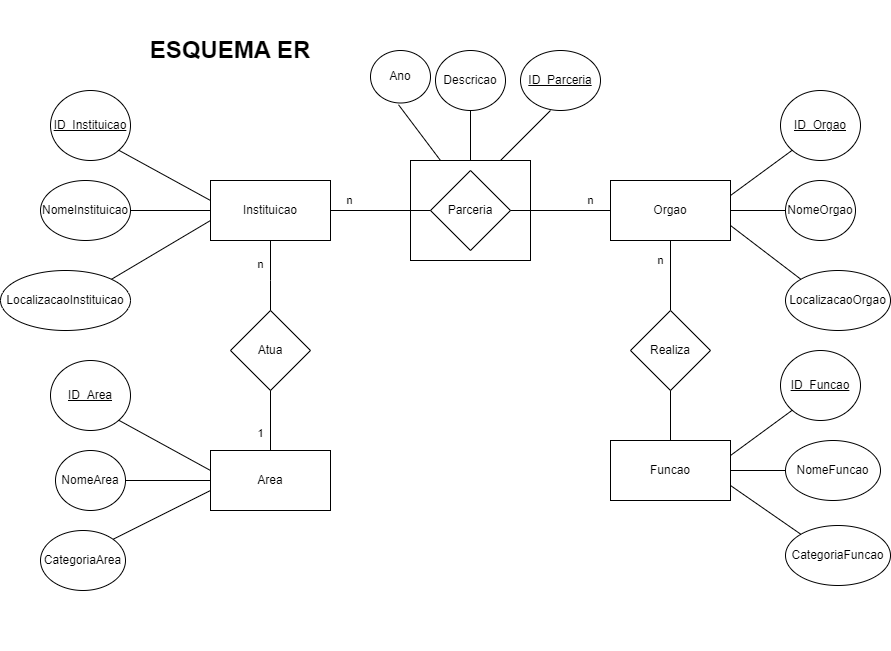

# 5. Diagrama relacional

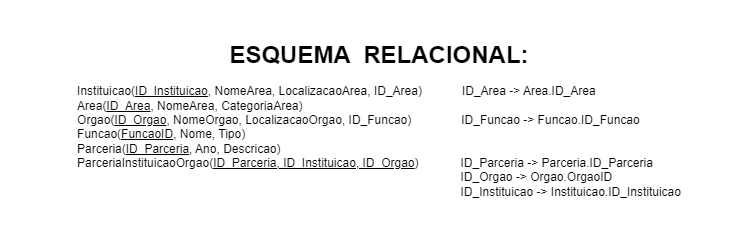

# 6. Consultas

## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)

Selecionar o nome e a localização das instituições localizadas em São Paulo/SP:

In [ ]:
query = """SELECT NomeInstituicao, LocalizacaoInstituicao FROM Instituicao WHERE LocalizacaoInstituicao = 'São Paulo/SP'"""
pd.read_sql_query(query, conn)


,NomeInstituicao,LocalizacaoInstituicao
0,Associação Brasileira do Emprego Apoiado (ABEA),São Paulo/SP
1,Bio.inn,São Paulo/SP
2,BioEdtech,São Paulo/SP
3,Biosys Gestão em Meio Ambiente LTDA,São Paulo/SP
4,Companhia de Saneamento Básico do Estado de Sã...,São Paulo/SP
5,Eyedea Educação e Desenvolvimento em Oftalmolo...,São Paulo/SP
6,Hospital das Clínicas-Faculdade de Medicina (USP),São Paulo/SP
7,"Indústria, Comércio, Importação e Exportação d...",São Paulo/SP
8,Instituto iCORPS Brasil,São Paulo/SP
9,Instituto Mauá de Tecnologia (IMT),São Paulo/SP


### 6.1.2 Consulta 2 (duas versões)

Selecionar o nome da instituição e o nome da área de atuação para as instituições pertencentes a categoria Saúde e Medicina

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, Area.NomeArea
FROM Instituicao
JOIN Area ON Instituicao.ID_Area = Area.ID_Area
WHERE Area.CategoriaArea = 'Saúde e Medicina'"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeArea
0,Centro Boldrini,Aplicação de tecnologias avançadas em serviços...
1,Centro de Desenvolvimento Tecnológico em Saúde...,Aplicação de tecnologias avançadas em serviços...
2,Eyedea Educação e Desenvolvimento em Oftalmolo...,Aplicação de tecnologias avançadas em serviços...
3,Fundação Oswaldo Cruz (Fiocruz) Unidade de Rib...,Aplicação de tecnologias avançadas em serviços...
4,Hospital da Restauração-Recife,Aplicação de tecnologias avançadas em serviços...
5,Hospital das Clínicas-Faculdade de Medicina (USP),Aplicação de tecnologias avançadas em serviços...
6,Hospital Municipal Miguel Couto-Rio de Janeiro,Aplicação de tecnologias avançadas em serviços...
7,Universidade Federal de Santa Catarina (UFSC),Aplicação de tecnologias avançadas em serviços...
8,Vetra,Aplicação de tecnologias avançadas em serviços...
9,Visto.Bio,Aplicação de tecnologias avançadas em serviços...


## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)

Consulta que retorna o nome da instituição e o nome do órgão associado a ela

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, OrgaoOrigem.NomeOrgao
FROM Instituicao
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN OrgaoOrigem ON ParceriaInstituicaoOrgao.ID_Orgao = OrgaoOrigem.ID_Orgao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeOrgao
0,Associação Brasileira do Emprego Apoiado (ABEA),Centro de Tecnologia da Informação Renato Archer
1,Biosys Gestão em Meio Ambiente LTDA,Centro de Tecnologia da Informação Renato Archer
2,BYD Energy do Brasil,Centro de Tecnologia da Informação Renato Archer
3,Centro Boldrini,Centro de Tecnologia da Informação Renato Archer
4,Universidade Estadual de Campinas (UNICAMP),Centro de Tecnologia da Informação Renato Archer
...,...,...
77,Universidade Federal de Santa Maria (UFSM),Centro de Tecnologia da Informação Renato Archer
78,Universidade Federal do ABC (UFABC),Centro de Tecnologia da Informação Renato Archer
79,Vetra,Centro de Tecnologia da Informação Renato Archer
80,Bio.inn,Centro de Tecnologia da Informação Renato Archer


### 6.2.2 Consulta 4 (duas versões)

Consulta que retorna o nome da instituição e a descrição da parceria associada a ela

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, Parceria.Descricao
FROM Instituicao
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN Parceria ON ParceriaInstituicaoOrgao.ID_Parceria = Parceria.ID_Parceria"""
pd.read_sql_query(query, conn)

,NomeInstituicao,Descricao
0,Associação Brasileira do Emprego Apoiado (ABEA),Construção de metodologia de inclusão social d...
1,Biosys Gestão em Meio Ambiente LTDA,Desenvolvimento de tratamento mecânico com pro...
2,BYD Energy do Brasil,Materiais avançados perovskita para células so...
3,Centro Boldrini,Uma Plataforma para Prontuários Semânticos de ...
4,Universidade Estadual de Campinas (UNICAMP),Uma Plataforma para Prontuários Semânticos de ...
...,...,...
77,Universidade Federal de Santa Maria (UFSM),Desenvolvimento de Novos Materiais para Impres...
78,Universidade Federal do ABC (UFABC),Desenvolvimento de testes eletroquímicos portá...
79,Vetra,Desenvolvimento de testes eletroquímicos portá...
80,Bio.inn,Desenvolvimento de testes eletroquímicos portá...


### 6.2.3 Consulta 5 (duas versões)

Consulta que retorna o nome da instituição, o nome do órgão e a descrição da parceria associada a eles

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, OrgaoOrigem.NomeOrgao, Parceria.Descricao
FROM Instituicao
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN OrgaoOrigem ON ParceriaInstituicaoOrgao.ID_Orgao = OrgaoOrigem.ID_Orgao
JOIN Parceria ON ParceriaInstituicaoOrgao.ID_Parceria = Parceria.ID_Parceria"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeOrgao,Descricao
0,Associação Brasileira do Emprego Apoiado (ABEA),Centro de Tecnologia da Informação Renato Archer,Construção de metodologia de inclusão social d...
1,Biosys Gestão em Meio Ambiente LTDA,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de tratamento mecânico com pro...
2,BYD Energy do Brasil,Centro de Tecnologia da Informação Renato Archer,Materiais avançados perovskita para células so...
3,Centro Boldrini,Centro de Tecnologia da Informação Renato Archer,Uma Plataforma para Prontuários Semânticos de ...
4,Universidade Estadual de Campinas (UNICAMP),Centro de Tecnologia da Informação Renato Archer,Uma Plataforma para Prontuários Semânticos de ...
...,...,...,...
77,Universidade Federal de Santa Maria (UFSM),Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de Novos Materiais para Impres...
78,Universidade Federal do ABC (UFABC),Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...
79,Vetra,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...
80,Bio.inn,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...


## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

Consulta que retorna o nome da instituição, o nome do órgão, a descrição da parceria e o tipo de função associados a eles

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, OrgaoOrigem.NomeOrgao, Parceria.Descricao, Funcao.NomeFuncao
FROM Instituicao
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN OrgaoOrigem ON ParceriaInstituicaoOrgao.ID_Orgao = OrgaoOrigem.ID_Orgao
JOIN Parceria ON ParceriaInstituicaoOrgao.ID_Parceria = Parceria.ID_Parceria
JOIN Funcao ON OrgaoOrigem.ID_Funcao = Funcao.ID_Funcao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeOrgao,Descricao,NomeFuncao
0,Associação Brasileira do Emprego Apoiado (ABEA),Centro de Tecnologia da Informação Renato Archer,Construção de metodologia de inclusão social d...,Integração entre os meios produtivo e o acadêmico
1,Biosys Gestão em Meio Ambiente LTDA,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de tratamento mecânico com pro...,Integração entre os meios produtivo e o acadêmico
2,BYD Energy do Brasil,Centro de Tecnologia da Informação Renato Archer,Materiais avançados perovskita para células so...,Integração entre os meios produtivo e o acadêmico
3,Centro Boldrini,Centro de Tecnologia da Informação Renato Archer,Uma Plataforma para Prontuários Semânticos de ...,Integração entre os meios produtivo e o acadêmico
4,Universidade Estadual de Campinas (UNICAMP),Centro de Tecnologia da Informação Renato Archer,Uma Plataforma para Prontuários Semânticos de ...,Integração entre os meios produtivo e o acadêmico
...,...,...,...,...
77,Universidade Federal de Santa Maria (UFSM),Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de Novos Materiais para Impres...,Integração entre os meios produtivo e o acadêmico
78,Universidade Federal do ABC (UFABC),Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...,Integração entre os meios produtivo e o acadêmico
79,Vetra,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...,Integração entre os meios produtivo e o acadêmico
80,Bio.inn,Centro de Tecnologia da Informação Renato Archer,Desenvolvimento de testes eletroquímicos portá...,Integração entre os meios produtivo e o acadêmico


### 6.3.2 Consulta 7 (duas versões)

Consulta que retorna o nome da instituição, o nome da área, a descrição da parceria e o tipo de função associados a eles

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, Area.NomeArea, Parceria.Descricao, Funcao.CategoriaFuncao
FROM Instituicao
JOIN Area ON Instituicao.ID_Area = Area.ID_Area
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN Parceria ON ParceriaInstituicaoOrgao.ID_Parceria = Parceria.ID_Parceria
JOIN OrgaoOrigem ON ParceriaInstituicaoOrgao.ID_Orgao = OrgaoOrigem.ID_Orgao
JOIN Funcao ON OrgaoOrigem.ID_Funcao = Funcao.ID_Funcao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeArea,Descricao,CategoriaFuncao
0,Associação Brasileira do Emprego Apoiado (ABEA),Promoção da inclusão no emprego de pessoas com...,Construção de metodologia de inclusão social d...,"Ciência, informação e comunicação"
1,Biosys Gestão em Meio Ambiente LTDA,Desenvolvimento de soluções tecnológicas para ...,Desenvolvimento de tratamento mecânico com pro...,"Ciência, informação e comunicação"
2,BYD Energy do Brasil,Desenvolvimento de tecnologias sustentáveis e ...,Materiais avançados perovskita para células so...,"Ciência, informação e comunicação"
3,Centro Boldrini,Aplicação de tecnologias avançadas em serviços...,Uma Plataforma para Prontuários Semânticos de ...,"Ciência, informação e comunicação"
4,Universidade Estadual de Campinas (UNICAMP),Pesquisa e desenvolvimento em diversas áreas t...,Uma Plataforma para Prontuários Semânticos de ...,"Ciência, informação e comunicação"
...,...,...,...,...
77,Universidade Federal de Santa Maria (UFSM),Pesquisa e desenvolvimento em diversas áreas t...,Desenvolvimento de Novos Materiais para Impres...,"Ciência, informação e comunicação"
78,Universidade Federal do ABC (UFABC),Inovação em biotecnologia e ciências da vida,Desenvolvimento de testes eletroquímicos portá...,"Ciência, informação e comunicação"
79,Vetra,Aplicação de tecnologias avançadas em serviços...,Desenvolvimento de testes eletroquímicos portá...,"Ciência, informação e comunicação"
80,Bio.inn,Inovação em biotecnologia e ciências da vida,Desenvolvimento de testes eletroquímicos portá...,"Ciência, informação e comunicação"


### 6.3.3 Consulta 8 (duas versões)

Consulta que retorna o nome da instituição, o nome da área, o nome do órgão e o tipo de função associados a eles

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, Area.NomeArea, OrgaoOrigem.NomeOrgao, Funcao.NomeFuncao
FROM Instituicao
JOIN Area ON Instituicao.ID_Area = Area.ID_Area
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN OrgaoOrigem ON ParceriaInstituicaoOrgao.ID_Orgao = OrgaoOrigem.ID_Orgao
JOIN Funcao ON OrgaoOrigem.ID_Funcao = Funcao.ID_Funcao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,NomeArea,NomeOrgao,NomeFuncao
0,Associação Brasileira do Emprego Apoiado (ABEA),Promoção da inclusão no emprego de pessoas com...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
1,Biosys Gestão em Meio Ambiente LTDA,Desenvolvimento de soluções tecnológicas para ...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
2,BYD Energy do Brasil,Desenvolvimento de tecnologias sustentáveis e ...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
3,Centro Boldrini,Aplicação de tecnologias avançadas em serviços...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
4,Universidade Estadual de Campinas (UNICAMP),Pesquisa e desenvolvimento em diversas áreas t...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
...,...,...,...,...
77,Universidade Federal de Santa Maria (UFSM),Pesquisa e desenvolvimento em diversas áreas t...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
78,Universidade Federal do ABC (UFABC),Inovação em biotecnologia e ciências da vida,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
79,Vetra,Aplicação de tecnologias avançadas em serviços...,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico
80,Bio.inn,Inovação em biotecnologia e ciências da vida,Centro de Tecnologia da Informação Renato Archer,Integração entre os meios produtivo e o acadêmico


## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)

Consulta que retorna a contagem de parcerias para cada instituição

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, COUNT(Parceria.ID_Parceria) AS TotalParcerias
FROM Instituicao
JOIN ParceriaInstituicaoOrgao ON Instituicao.ID_Instituicao = ParceriaInstituicaoOrgao.ID_Instituicao
JOIN Parceria ON ParceriaInstituicaoOrgao.ID_Parceria = Parceria.ID_Parceria
GROUP BY Instituicao.LocalizacaoInstituicao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,TotalParcerias
0,"Ministério da Ciência, Tecnologia e Inovações ...",5
1,BYD Energy do Brasil,25
2,Instituto de Biologia Molecular do Paraná - IBMP,3
3,Instituto Nacional de Metrologia (INMETRO),1
4,Universidade Federal de Santa Catarina (UFSC),1
5,Universidade Federal de Juiz de Fora (UFJF),2
6,Instituto de Desenvolvimento de Londrina - CODEL,1
7,Instituto Federal do Rio Grande do Norte (IFRN),1
8,Universidade Federal Fluminense (UFF),1
9,Hospital da Restauração-Recife,1


### 6.4.2 Consulta 10 (duas versões)

Consulta que retorna a soma das áreas de atuação para cada instituição

In [ ]:
query = """SELECT Instituicao.NomeInstituicao, SUM(Area.ID_Area) AS SomaAreas
FROM Instituicao
JOIN Area ON Instituicao.ID_Area = Area.ID_Area
GROUP BY Instituicao.NomeInstituicao"""
pd.read_sql_query(query, conn)

,NomeInstituicao,SomaAreas
0,Associação Brasileira do Emprego Apoiado (ABEA),9
1,BYD Energy do Brasil,5
2,Bio.inn,6
3,BioEdtech,3
4,Biosys Gestão em Meio Ambiente LTDA,2
5,CEPID - BRAINN,7
6,Centro Boldrini,1
7,Centro Brasileiro de Pesquisas Físicas (CBPF),8
8,Centro Nacional de Tecnologia Eletrônica Avanç...,4
9,Centro Universitário FEI,7


# 7. Autoavaliação dos membros

Lucas de Almeida Martins: Como atividade principal, desenvolvi o esquema ER e o esquema relacional. Além disso, auxiliei em outras partes do projeto, principalmente contribuindo na coesão das demais partes do trabalho.